# Get started with TensorFlow

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 15s 251us/step - loss: 0.2190 - acc: 0.9354
Epoch 2/5
60000/60000 [==============================] - 15s 248us/step - loss: 0.0954 - acc: 0.9709
Epoch 3/5
15296/60000 [======>.......................] - ETA: 11s - loss: 0.0599 - acc: 0.9812

60000/60000 [==============================] - 15s 246us/step - loss: 0.0658 - acc: 0.9792
Epoch 4/5
60000/60000 [==============================] - 15s 249us/step - loss: 0.0522 - acc: 0.9830
Epoch 5/5
24736/60000 [===========>..................] - ETA: 8s - loss: 0.0419 - acc: 0.9867

10000/10000 [==============================] - 0s 50us/step


[0.058035363704263, 0.9823]

## Learn and use ML

### Train neural network: basic classification

#### Import the Fashion MNIST dataset

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.9.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 3s 1us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Explore the data

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

#### Preprocess the data

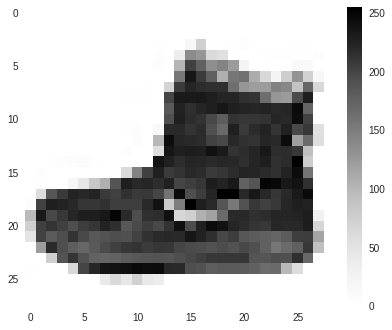

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

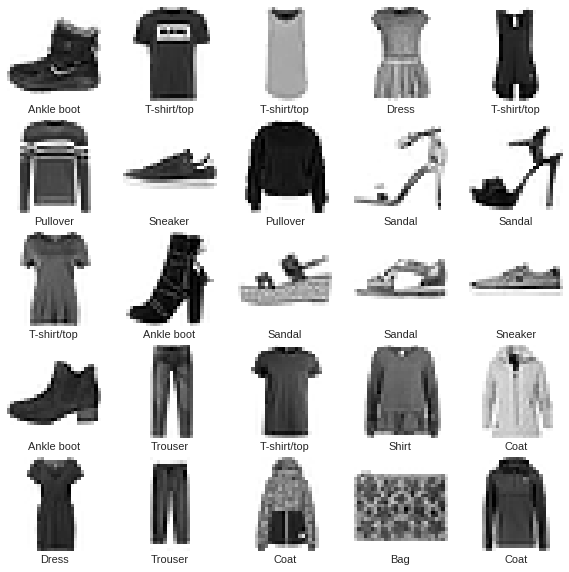

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

#### Build the model

##### Setup the layers

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

##### Compile the model

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Train the model

In [0]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.4978 - acc: 0.8261
Epoch 2/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.3750 - acc: 0.8637
Epoch 3/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.3356 - acc: 0.8779
Epoch 4/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.3130 - acc: 0.8845
Epoch 5/5
20224/60000 [=========>....................] - ETA: 2s - loss: 0.2972 - acc: 0.8929

60000/60000 [==============================] - 4s 73us/step - loss: 0.2962 - acc: 0.8903


#### Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 27us/step
('Test accuracy:', 0.8779)


#### Make predictions

In [0]:
predictions = model.predict(test_images)
predictions[0]

array([7.3492383e-06, 3.6656463e-08, 1.3729948e-07, 2.0216341e-08,
       3.5886426e-06, 1.3199381e-02, 2.8355205e-05, 6.1611027e-02,
       2.6625770e-05, 9.2512345e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

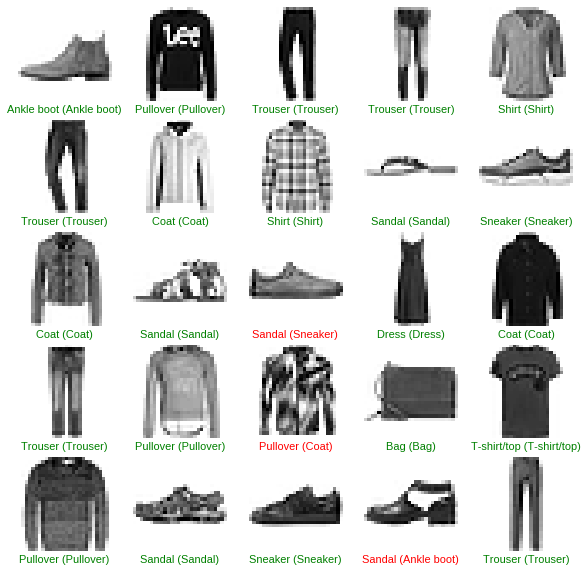

In [0]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)

In [0]:
# Grab an image from the test dataset
img = test_images[0]
print(img.shape)

(28, 28)


In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [0]:
predictions = model.predict(img)

print(predictions)

[[7.3492383e-06 3.6656463e-08 1.3729974e-07 2.0216341e-08 3.5886392e-06
  1.3199394e-02 2.8355205e-05 6.1611027e-02 2.6625770e-05 9.2512345e-01]]


In [0]:
prediction = predictions[0]

np.argmax(prediction)

9

###  Classify movie reviews: binary classification

#### Download the IMDB dataset

In [0]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#### Explore the data

In [0]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [0]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
len(train_data[0]), len(train_data[1])

(218, 189)

##### Convert the integers back to words

In [0]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [0]:
decode_review(train_data[0])

u"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for w

#### Prepare the data

In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [0]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [0]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

#### Build the model

In [0]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Create a validation set

In [0]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

#### Train the model

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 73us/step - loss: 0.6928 - acc: 0.5211 - val_loss: 0.6907 - val_acc: 0.5274
Epoch 2/40
15000/15000 [==============================] - 1s 51us/step - loss: 0.6892 - acc: 0.5601 - val_loss: 0.6878 - val_acc: 0.5989
Epoch 3/40
15000/15000 [==============================] - 1s 52us/step - loss: 0.6860 - acc: 0.6026 - val_loss: 0.6850 - val_acc: 0.6123
Epoch 4/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.6821 - acc: 0.6429 - val_loss: 0.6819 - val_acc: 0.5653
Epoch 5/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.6769 - acc: 0.6603 - val_loss: 0.6751 - val_acc: 0.6734
Epoch 6/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.6697 - acc: 0.7019 - val_loss: 0.6675 - val_acc: 0.7003
Epoch 7/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.6599 - acc: 0.7196 - val_loss: 0.6577 - val_acc

15000/15000 [==============================] - 1s 61us/step - loss: 0.6122 - acc: 0.7630 - val_loss: 0.6096 - val_acc: 0.7524
Epoch 11/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.5903 - acc: 0.7669 - val_loss: 0.5900 - val_acc: 0.7563
Epoch 12/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.5656 - acc: 0.7834 - val_loss: 0.5652 - val_acc: 0.7761
Epoch 13/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.5385 - acc: 0.8007 - val_loss: 0.5412 - val_acc: 0.7896
Epoch 14/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.5112 - acc: 0.8143 - val_loss: 0.5160 - val_acc: 0.8015
Epoch 15/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.4835 - acc: 0.8274 - val_loss: 0.4908 - val_acc: 0.8117
Epoch 16/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.4569 - acc: 0.8363 - val_loss: 0.4674 - val_acc: 0.8211
Epoch 17/40
15000/15000 [=====================

15000/15000 [==============================] - 1s 61us/step - loss: 0.3849 - acc: 0.8685 - val_loss: 0.4073 - val_acc: 0.8465
Epoch 20/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.3654 - acc: 0.8765 - val_loss: 0.3916 - val_acc: 0.8514
Epoch 21/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.3477 - acc: 0.8810 - val_loss: 0.3778 - val_acc: 0.8574
Epoch 22/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.3320 - acc: 0.8859 - val_loss: 0.3660 - val_acc: 0.8611
Epoch 23/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.3181 - acc: 0.8902 - val_loss: 0.3561 - val_acc: 0.8620
Epoch 24/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.3052 - acc: 0.8935 - val_loss: 0.3468 - val_acc: 0.8667
Epoch 25/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.2938 - acc: 0.8981 - val_loss: 0.3390 - val_acc: 0.8687
Epoch 26/40
15000/15000 [=====================

15000/15000 [==============================] - 1s 61us/step - loss: 0.2647 - acc: 0.9069 - val_loss: 0.3208 - val_acc: 0.8747
Epoch 29/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.2565 - acc: 0.9097 - val_loss: 0.3164 - val_acc: 0.8750
Epoch 30/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.2496 - acc: 0.9101 - val_loss: 0.3121 - val_acc: 0.8775
Epoch 31/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.2415 - acc: 0.9146 - val_loss: 0.3087 - val_acc: 0.8788
Epoch 32/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.2353 - acc: 0.9171 - val_loss: 0.3055 - val_acc: 0.8792
Epoch 33/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.2281 - acc: 0.9193 - val_loss: 0.3026 - val_acc: 0.8792
Epoch 34/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.2221 - acc: 0.9220 - val_loss: 0.3003 - val_acc: 0.8798
Epoch 35/40
15000/15000 [=====================

15000/15000 [==============================] - 1s 61us/step - loss: 0.2053 - acc: 0.9279 - val_loss: 0.2943 - val_acc: 0.8820
Epoch 38/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.2003 - acc: 0.9291 - val_loss: 0.2924 - val_acc: 0.8842
Epoch 39/40
15000/15000 [==============================] - 1s 62us/step - loss: 0.1950 - acc: 0.9311 - val_loss: 0.2911 - val_acc: 0.8842
Epoch 40/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.1904 - acc: 0.9334 - val_loss: 0.2897 - val_acc: 0.8839


#### Evaluate the model

In [0]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 31us/step
[0.30571386238098147, 0.87384]


#### Create a graph of accuracy and loss over time

In [0]:
history_dict = history.history
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

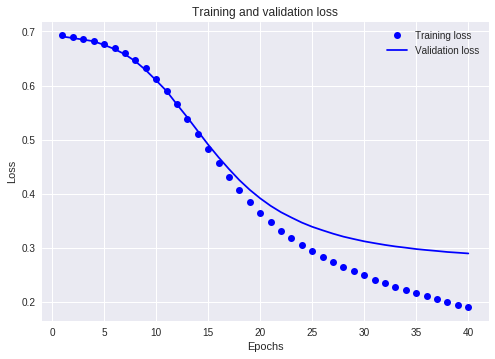

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

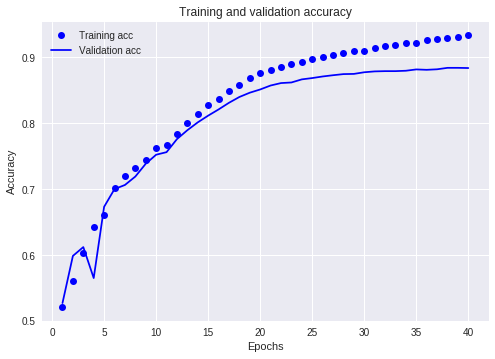

In [0]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

###  Predict house prices: regression

#### The Boston Housing Prices dataset

In [0]:
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

##### Examples and features

In [0]:
print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features

Training set: (404, 13)
Testing set:  (102, 13)


In [0]:
print(train_data[0])  # Display sample features, notice the different scales

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


In [0]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


##### Labels

In [0]:
print(train_labels[0:10])  # Display first 10 entries

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


#### Normalize features

In [0]:
# Test data is *not* used when calculating the mean and std.

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(train_data[0])  # First training sample, normalized

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


#### Create the model

In [0]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


#### Train the model

In [0]:
from __future__ import print_function
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

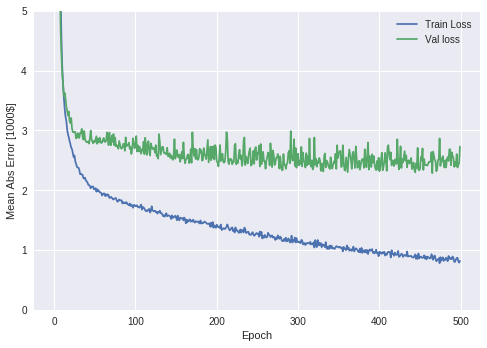

In [0]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0,5])

plot_history(history)


....................................................................................................
.............................................................................................

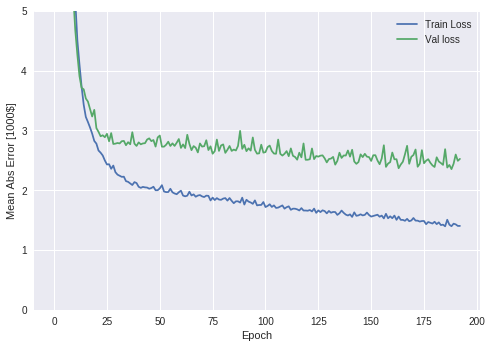

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $2679.00


#### Predict

In [0]:
test_predictions = model.predict(test_data).flatten()

print(test_predictions)

[ 9.413306  20.208292  22.208458  35.84527   26.441996  22.10927
 25.827114  22.030752  21.297647  23.04385   20.253763  17.663485
 17.026514  43.01508   21.309362  20.825048  27.167164  19.093023
 21.060465  28.294436  12.8793955 14.773374  22.35121   16.941687
 21.213037  26.67111   31.201519  33.373566  11.664246  19.979141
 20.850962  15.698544  32.798584  25.372534  19.430681   9.082605
 18.52954   18.679262  20.646883  25.66525   32.018246  29.07574
 14.806787  42.787098  32.17644   26.61979   28.56296   18.80353
 23.643482  23.359022  35.277393  21.880945  11.935746  15.775812
 35.55775   28.927645  12.935718  50.02827   34.244396  25.941254
 25.54697   16.82453   15.570931  20.338293  24.605589  21.468721
 13.847179  22.30834   13.099641   8.329051  26.831758  30.156982
 27.826622  13.590346  24.703087  20.270327  19.50218   24.98152
 35.481144  11.123991  21.941332  39.05374   17.937723  14.179303
 18.207342  20.66059   21.520384  20.938765  22.214087  32.483776
 22.002287  19

###  Explore overfitting and underfitting

#### Download the IMDB dataset

In [3]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17473536/17464789 [==============================] - 1s 0us/step


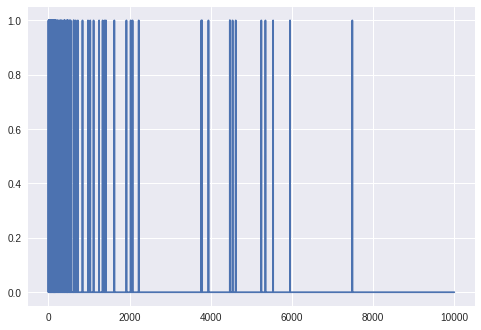

In [4]:
plt.plot(train_data[0])

#### Demonstrate overfitting

##### Create a baseline model

In [5]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.4795 - acc: 0.7953 - binary_crossentropy: 0.4795 - val_loss: 0.3286 - val_acc: 0.8793 - val_binary_crossentropy: 0.3286
Epoch 2/20
 - 4s - loss: 0.2449 - acc: 0.9132 - binary_crossentropy: 0.2449 - val_loss: 0.2847 - val_acc: 0.8881 - val_binary_crossentropy: 0.2847
Epoch 3/20
 - 4s - loss: 0.1818 - acc: 0.9374 - binary_crossentropy: 0.1818 - val_loss: 0.2895 - val_acc: 0.8851 - val_binary_crossentropy: 0.2895
Epoch 4/20
 - 4s - loss: 0.1466 - acc: 0.9510 - binary_crossentropy: 0.1466 - val_loss: 0.3129 - val_acc: 0.8799 - val_binary_crossentropy: 0.3129
Epoch 5/20
 - 4s - loss: 0.1224 - acc: 0.9601 - binary_crossentropy: 0.1224 - val_loss: 0.3397 - val_acc: 0.8730 - val_binary_crossentropy: 0.3397
Epoch 6/20
 - 4s - loss: 0.1004 - acc: 0.9690 - binary_crossentropy: 0.1004 - val_loss: 0.3716 - val_acc: 0.8703 - val_binary_crossentropy: 0.3716
Epoch 7/20
 - 4s - loss: 0.0812 - acc: 0.9774 - binary_crossentropy:

##### Create a smaller model

In [7]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6007 - acc: 0.6550 - binary_crossentropy: 0.6007 - val_loss: 0.5370 - val_acc: 0.7804 - val_binary_crossentropy: 0.5370
Epoch 2/20
 - 4s - loss: 0.4891 - acc: 0.8391 - binary_crossentropy: 0.4891 - val_loss: 0.4870 - val_acc: 0.8474 - val_binary_crossentropy: 0.4870
Epoch 3/20
 - 4s - loss: 0.4394 - acc: 0.8922 - binary_crossentropy: 0.4394 - val_loss: 0.4629 - val_acc: 0.8567 - val_binary_crossentropy: 0.4629
Epoch 4/20
 - 4s - loss: 0.4050 - acc: 0.9189 - binary_crossentropy: 0.4050 - val_loss: 0.4491 - val_acc: 0.8667 - val_binary_crossentropy: 0.4491
Epoch 5/20
 - 4s - loss: 0.3774 - acc: 0.9365 - binary_crossentropy: 0.3774 - val_loss: 0.4459 - val_acc: 0.8617 - val_binary_crossentropy: 0.4459
Epoch 6/20
 - 4s - loss: 0.3539 - acc: 0.9483 - binary_crossentropy: 0.3539 - val_loss: 0.4396 - val_acc: 0.8680 - val_binary_crossentropy: 0.4396
Epoch 7/20
 - 4s - loss: 0.3330 - acc: 0.9584 - binary_crossentropy:

##### Create a bigger model

In [9]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [10]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 21s - loss: 0.3479 - acc: 0.8507 - binary_crossentropy: 0.3479 - val_loss: 0.2928 - val_acc: 0.8831 - val_binary_crossentropy: 0.2928
Epoch 2/20
 - 20s - loss: 0.1409 - acc: 0.9491 - binary_crossentropy: 0.1409 - val_loss: 0.3570 - val_acc: 0.8637 - val_binary_crossentropy: 0.3570
Epoch 3/20
 - 21s - loss: 0.0459 - acc: 0.9871 - binary_crossentropy: 0.0459 - val_loss: 0.4303 - val_acc: 0.8689 - val_binary_crossentropy: 0.4303
Epoch 4/20
 - 21s - loss: 0.0066 - acc: 0.9992 - binary_crossentropy: 0.0066 - val_loss: 0.5943 - val_acc: 0.8712 - val_binary_crossentropy: 0.5943
Epoch 5/20
 - 20s - loss: 6.2142e-04 - acc: 1.0000 - binary_crossentropy: 6.2142e-04 - val_loss: 0.6838 - val_acc: 0.8708 - val_binary_crossentropy: 0.6838
Epoch 6/20
 - 20s - loss: 2.0099e-04 - acc: 1.0000 - binary_crossentropy: 2.0099e-04 - val_loss: 0.7162 - val_acc: 0.8707 - val_binary_crossentropy: 0.7162
Epoch 7/20
 - 20s - loss: 1.2700e-04 - acc: 1.

KeyboardInterrupt: ignored